In [1]:
import os

In [330]:
TOP = os.getcwd().replace('notebooks','')
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
interim_dir = TOP + 'data/interim/'
figures_dir = TOP + 'reports/figures/'

In [331]:
figures_dir

'/home/grace/Documents/python/tsca_categories/reports/figures/'

In [4]:
def split_file(input_file, output_prefix, n_rows):
    with open(input_file, 'r') as file:
        lines = file.readlines()
    
    # Calculate the number of chunks
    num_chunks = (len(lines) + n_rows - 1) // n_rows
    
    for i in range(num_chunks):
        chunk_lines = lines[i*n_rows : (i+1)*n_rows]
        output_file = f"{output_prefix}_part{i+1}.txt"
        with open(output_file, 'w') as chunk_file:
            chunk_file.writelines(chunk_lines)
        


In [7]:
input_file = processed_dir+'TSCA_2022_.txt'
output_prefix = external_dir+'chunked_data'
n_rows = 1000  # number of rows per chunk

In [8]:
split_file(input_file, output_prefix, n_rows)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
%matplotlib inline

In [105]:
def smiles_inchi(s):
    try:
        a = Chem.MolFromSmiles(s)
        b = Chem.MolToInchi(a) 
        return Chem.InchiToInchiKey(b)
    except Exception as error:
        print(f"Error processing SMILES string {s}: {error}")
        return None

In [79]:
tsca = pd.read_csv(processed_dir+'TSCA_2022.txt', sep = '\t', header = None,names =['smiles', 'dtxsid'])

In [90]:
tsca_dict = {k:v for k,v in zip( tsca['smiles'], tsca['dtxsid'])}

In [106]:
tsca_inchi = {smiles_inchi(k): v for k,v in tsca_dict.items()}

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41]

Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]1)([O-]\C(=[O]/2)C(CC)CCCC)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Co++]2([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string ClCCO[P+3](OCCCl)(OCCCl)[Cu+][Cl-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Metal was disconnected

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined

Error processing SMILES string Cl[Ru+](Cl)([C-]#[O+])([C-]#[O+])(P(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1)P(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]C1=C(\C=[N]2\CC\[N]([Co++]2)=C\C2=CC=CC(F)=C2[O-])C=CC=C1F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=[C--]1[Co++]2([C-]#[O+])([C-]#[O+])([C-]#[O+])[C--](=O)[Co++]12([C-]#[O+])([C-]#[O+])[C-]#[O+]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:41] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Charges were rearranged

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] Explicit valence for atom # 4 N, 4, is greater than permitted
[12:17:41] WARNING: Metal was disconnected

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41] WARNING: Omitted undefined stereo

[12:17:41

Error processing SMILES string [H][C-]1C(C)=[O][Ti+4]2([O-]CC)([O-]C(C)C)([O]=C1C)[O]=C(C)[C-]([H])C(C)=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string C[O](C)[B](F)(F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string F[Br](F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O]#C[W](C#[O])(C#[O])(C#[O])(C#[O])C#[O]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCCCCC[N](C)(C)[B+3]([Cl-])([Cl-])[Cl-]: Python arg

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefi

Error processing SMILES string CO[B+3]([F-])([F-])[F-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O]1C2=C(C=C(C=C2C(=O)[O-][Zn++]11[O-]C(=O)C2=CC(=CC(=C2[O]1[H])C(C)(C)C)C(C)(C)C)C(C)(C)C)C(C)(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNIN

Error processing SMILES string O=C1[O-][Y+3]2([O-]C1=O)[O-]C1=[O][Y+3]3([O-]C(=O)C(=O)[O-]3)[O-]C1=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O-][Ti+4]123[O-]CC[N]1(CC[O-]2)CC[O-]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O-][Cr+3]1([O-][H])[O-]C(CCCCCCCCCCCCC)=[O][Cr+3]([O-][H])([O-][H])[O-]1[H]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneT

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Accepted unusual valence(s): Ce(2); Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] Explicit valence for atom # 8 O, 3, is greater than permitted
[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Ch

Error processing SMILES string F[Cl](F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string -: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [BH2]1[H][BH2][H]1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O]#C[Mo](C#[O])(C#[O])(C#[O])(C#[O])C#[O]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:42] WARNING: Accepted unusual valence(s): Si(3); Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Charges were rearranged

[12:17:42] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:42] WARNING: Metal was disconnected

[12:17:42] WARNING: Omitted undefined stereo

[12:17:42] WARNING: Metal w

Error processing SMILES string [H]OC1=C(\N=N\C2=CC=C(C=C2)N([H])C(=O)C2=CC=C(C=C2)\N=N\C2=C(O[H])N([H])C(=O)C(=C2C)[N]2=CC=CC(C)=C2)C(C)=C(C(=O)N1[H])[N]1=CC(C)=CC=C1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(C)=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC[O](CC)[B+3]([F-])([F-])[F-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O]#C[Ru]1(C#[O])(C#[O])(C#[O])[Ru](C#[O])(C#[O])(C#[O])(C#[O])[Ru]1(C#[O])(C#[O])(C#[O])C#[O]: Python

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Metal was disconnected; Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Accepted unusual valence(s): Mo+3(2); Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:43] WARNING: Omitted undefined stereo

[12:17:43] WARNING: Metal was disconnected

[12:17:43] WARNING: Charges were rearranged; Omitted undefined s

Error processing SMILES string CCOC1=[O][Ti+4]23([O-]CCC[O-]2)([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(OCC)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]1N2C=CC=CC2=[S][Zn++]11[O-]N2C=CC=CC2=[S]1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCC12C[O-][Zr+4]([O-]C3=CC(N)=CC=C3)([O-]C3=CC(N)=CC=C3)([O-]C3=CC(N)=CC=C3)([O](CC=C)C1)[O](CC=C)C2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string B#[Si](#B)(#B)(#B)(#B)#B: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44

Error processing SMILES string [H][C-]1C(C)=[O][Al+3]2([O-]CC(C)C[O-]2)[O]=C1OC(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[C-]12[C]3(=[C]4([C]5(=[C]1([Zr+4]23451234([C]5(=[C]1([C-]2([C]3(=[C]45[H])[H])CCCC)[H])[H])([Cl-])[Cl-])[H])[H])[H])[H]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Charges were rearranged

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Charges were rearranged

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARNING: Omitted undefined stereo

[12:17:44] WARN

Error processing SMILES string O=C1[O-][Gd+3]2([O-]C1=O)[O-]C1=[O][Gd+3]3([O-]C(=O)C(=O)[O-]3)[O-]C1=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string C[N-](C)[Zr+4]1234([C]5(=[C]1([H])[C-]2([H])[C]3(=[C]45[H])[H])[H])([N-](C)C)[N-](C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]C1=C(Cl)C2=[O][Hg++][O-]C2=C(Cl)C1=O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][C-]1C(C)=[O][Ti+4]23([O-]CCC[O-]2)([O]=C1C)[O]=C(C)[C-]([H])C(C)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInch

[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] Explicit valence for atom # 0 O, 3, is greater than permitted
[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[1

Error processing SMILES string [O-]1[Ti+4]234([O-]CC[N]2(C)C)([O-]CC[N]3(C)C)([O-]CC[N]4(C)C)[N](C)(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[Sn]123(CCCC)OC(C)=CC(C)=[O]1.CC(O2)=CC(C)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Co+3]234([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2.CC([CH-]C(C)=[O]3)=[O]4: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged; Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Proton(s) added/removed

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted und

Error processing SMILES string CC1=[O][V++]2(=O)([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][B]1234[H][B]115([H])[B]678([H])[H][B]669([H])[H][B]66%10([H])[B]22([H])([H]3)[B]411([H])[B]573([H])[B]896([H])[B]%10213[H]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string F[Cl](=O)(=O)=O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H][O-]1[Cr+3]([Cl-])([Cl-])[O-]C(CCCCCCCCCCCCC)=[O][Cr+3]1([Cl-])[Cl-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDK

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] Explicit valence for atom # 1 Cl, 7, is greater than permitted
[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Metal was disconnected

[12:17:45] WARNING: Charges were rearranged; Metal was disconnected

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Salt was disconnected; Proton(s) added/removed

[12:17:45] WAR

Error processing SMILES string CC1C=C[C-](=C1)[Mn+]([C-]#[O+])([C-]#[O+])[C-]#[O+]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Mn]2345[O-]C(C)=[O][Mn+3]67([O-]1)([O]=C(C)[O-]2)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Charges were rearranged

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:45] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WA

Error processing SMILES string CC(=C)C(=O)OCC(O)C[N]1(CC(=O)[O-][Mg++]11[O-]C(=O)C[N]1(CC(O)COC(=O)C(C)=C)C1=CC=C(C)C=C1)C1=CC=C(C)C=C1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:17:46] WARNING: Accepted unusual valence(s): Si(1)

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Metal was disconnected

[12:17:46] WARNING: Metal was disconnected

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Metal was disconnected; Proton(s) added/removed

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Accepted unusual valence(s): Er(12); Metal was disconnected

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] WARNING: Omitted undefined stereo

[12:17:46] Expli

In [108]:
len(tsca_inchi)

14182

In [32]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors


In [109]:
import glob

In [115]:
files = glob.glob(external_dir+'/report_summary*.txt',  
                   recursive = True) 

In [122]:
def prep_df(f):
    df = pd.read_csv(f, sep = '\t',skiprows=36)
    df['INCHI'] = df['SMILES'].apply(lambda x: smiles_inchi(x))
    df['dtxsid'] = df['INCHI'].apply(lambda x: tsca_inchi[x] if x in tsca_inchi.keys() else np.nan )
    return df

In [126]:
mydfs = []
for f in files:
    mydfs.append(prep_df(f))
    

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Metal was disconnected

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefine

Error processing SMILES string -: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H]1B[H]B1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O#C[Mo](C#O)(C#O)(C#O)(C#O)C#O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:46] WARNING: Metal was disconnected

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Metal was disconnected

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Charges were rearranged

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WARNING: Omitted undefined stereo

[12:35:46] WAR

Error processing SMILES string O=C(Nc3ccc(N=NC1=C(O)NC(=O)C(=C1C)n2cccc(c2)C)cc3)c6ccc(N=NC4=C(O)NC(=O)C(=C4C)n5cccc(c5)C)cc6: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(C)=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=[C-2]1[Co+2]2([C-]#[O+])([C-]#[O+])([C-]#[O+])([C-2](=O)[Co+2]12([C-]#[O+])([C-]#[O+])([C-]#[O+])): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([CH-]C(=O[Ti+4]12(O=C([CH-]C(=O2)C)C)([O-]CC)[O-]C(C)C)C)C: Python a

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Metal was disconnected

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined st

Error processing SMILES string FB(F)(F)O(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string FBr(F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O#C[W](C#O)(C#O)(C#O)(C#O)C#O: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCCCCCN(C)(C)[B+3]([Cl-])([Cl-])[Cl-]: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string B#[Si](#B)(#B)#B: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Charges were rearranged

[12:35:47] WARNING: Metal was disconnected

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] WARNING: Omitted undefined stereo

[12:35:47] Explicit valence for atom # 8 N, 4, is greater than permitted
[12:35:47] WARNING: Charges were rearranged

[12:35:47] 

Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]1)([O-]\C(=[O]/2)C(CC)CCCC)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([CH-]C(=O[Co+2]12(O=C([CH-]C(=O2)C)C))C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Accepted unusual valence(s): Ca(18); Metal was disconnected

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omi

Error processing SMILES string [F-][B+3]([F-])([F-])OC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=C4[O-][Zn+2]1([O-]C(=O)c2cc(cc(c2(O1))C(C)(C)C)C(C)(C)C)(Oc3c4(cc(cc3C(C)(C)C)C(C)(C)C)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Metal was disconnected

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefine

Error processing SMILES string O=C4[O-][Gd+3]1(O=C2[O-][Gd+3]3(O=C2([O-]1))([O-]C(=O)C(=O)[O-]3))([O-]C4(=O)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [N-](C)(C)[Zr+4]2345([N-](C)C)([N-](C)C)(C=1C5(=C4([CH-]3(C=12)))): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=C2C([O-])=C(C1=O[Hg+2][O-]C1=C2Cl)Cl: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([CH-]C(=O[Ti+4]123(O=C([CH-]C(=O2)C)C)([O-]CCC[O-]3))C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::stri

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Omitted undefined stereo

[12:35:48] WARNING: Metal was disconnected

[12:35:48] W

Error processing SMILES string O=C4[O-][Y+3]1(O=C2[O-][Y+3]3(O=C2([O-]1))([O-]C(=O)C(=O)[O-]3))([O-]C4(=O)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [OH-][Ti+4]123([O-]CCN3(CC[O-]1)(CC[O-]2)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [OH-][Cr+3]1([OH-])(O=C([O-][Cr+3]([OH-])([OH-])[OH-]1)CCCCCCCCCCCCC): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCCC(CC)C1=[O][Mn+3]2345[O-]C(=[O][Mn]67([O-]\C(C)=[O]/2)([O-]1)[N]1(C)CC[N]6(C)CC[N]7(C)CC1)C(CC)CCCC.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, s

[12:35:49] WARNING: Charges were rearranged

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Charges were rearranged

[12:35:49] WARNING: Accepted unusual valence(s): Bi(4); Metal was disconnected; Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted 

Error processing SMILES string FCl(F)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[Sn]123(CCCC)OC(C)=CC(C)=[O]1.CC(O2)=CC(C)=[O]3: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CC1=[O][Co+3]234([O]=C(C)[CH-]1)[O]=C(C)[CH-]C(C)=[O]2.CC([CH-]C(C)=[O]3)=[O]4: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Charges were rearranged

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49] WARNING: Omitted undefined stereo

[12:35:49]

Error processing SMILES string [F-][B+3]([F-])([F-])O(CC)CC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O#C[Ru]1(C#O)(C#O)(C#O)([Ru](C#O)(C#O)(C#O)(C#O)[Ru]1(C#O)(C#O)(C#O)(C#O)): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:50] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Salt was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Accepted unusual valence(s): Ni(4); Metal was disconnected; Proton(s) added/removed; Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING

Error processing SMILES string -: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=[V+2]12(O=C([CH-]C(=O1)C)C)(O=C([CH-]C(=O2)C)C): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Accepted unusual valence(s): Ti(2); Metal was disconnected

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: O

Error processing SMILES string [H]3B145([H]B16%12(B%11%13%16([H]B29%16([H]B28%10(B347(B56%14(B78%15(B9%10%11B%12%13%14%15)))))))): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O=Cl(=O)(=O)F: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string O1=C([O-][Cr+3]([OH-][Cr+3]1([Cl-])[Cl-])([Cl-])[Cl-])CCCCCCCCCCCCC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [H]1B258([H]B378([H]B467([H]B156(B234)))): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error pro

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Accepted unusual valence(s): Re(5); Metal was disconnected; Proton(s) added/removed

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Metal was disconnected


Error processing SMILES string CC1=[O][Mn]2345[O-]C(C)=[O][Mn+3]67([O-]1)([O]=C(C)[O-]2)[N]1(C)CC[N]6(C)CC[N]7(C)CC1.C[N]31CC[N]4(C)CC[N]5(C)CC1: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Metal was disconnected

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Charges were rearranged

[12:35:50] WARNING: Omitted undefined stereo

[12:35:50] WA

Error processing SMILES string O=C(OCC(O)CN4(c1ccc(cc1)C)(CC(=O)[O-][Mg+2]34([O-]C(=O)CN3(c2ccc(cc2)C)(CC(O)COC(=O)C(=C)C))))C(=C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined

Error processing SMILES string O(C1=O[Al+3]2(O=C([CH-]1)C)([O-]CC(C)C[O-]2))C(C)C: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string CCCC[C-]1%10(C9=C2C3=C1[Zr+4]2356789%10(C=4C8(=C7([C-]6(CCCC)(C=45))))([Cl-])[Cl-]): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:51] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected

[12:35:51] WARNING: Metal was disconnected

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Metal was disconnected; Proton(s) added/removed

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WA

Error processing SMILES string O(C2=O[Ti+4]13(O=C(OCC)[CH-]C(=O1)C)(O=C([CH-]2)C)([O-]CCC[O-]3))CC: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]2N1C=CC=CC1=S[Zn+2]24([O-]N3C=CC=CC3=S4): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-](c1cccc(N)c1)[Zr+4]45([O-]c2cccc(N)c2)([O-]c3cccc(N)c3)([O-]CC(CO4(CC=C))(CO5(CC=C))CC): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string B#[Si](#B)(#B)(#B)(#B)#B: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Er

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Charges were rearranged

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefined stereo

[12:35:51] WARNING: Omitted undefine

Error processing SMILES string [O+]#[C-][Ru+]([C-]#[O+])(Cl)(Cl)(P(c1ccccc1)(c2ccccc2)c3ccccc3)P(c4ccccc4)(c5ccccc5)c6ccccc6: Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')
Error processing SMILES string [O-]c3c(F)cccc3(C=N2CCN(=Cc1cccc(F)c1([O-]))[Co+2]2): Python argument types in
    rdkit.Chem.rdinchi.MolToInchi(NoneType, str)
did not match C++ signature:
    MolToInchi(RDKit::ROMol mol, std::string options='')


[12:35:52] WARNING: Charges were rearranged

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Metal was disconnected

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:52] WARNING: Charges were rearranged

[12:35:52] WARNING: Charges were rearranged; Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefined stereo

[12:35:52] WARNING: Omitted undefi

In [128]:
vega = pd.concat(mydfs)

In [129]:
vega.shape

(13948, 71)

In [149]:
vega.columns[-2:].tolist()[::-1]

['dtxsid', 'INCHI']

In [151]:
vega = vega[vega.columns[-2:].tolist()[::-1] + vega.columns[2:-2].tolist()]

In [154]:
vega1 = vega.dropna(subset = 'dtxsid')

In [155]:
vega1.shape

(12928, 69)

In [158]:
vega1.to_csv(external_dir+'vega_110624.csv')

In [160]:
len([e for e in vega1.columns if 'prediction' in e])

33

In [161]:
models = [e for e in vega1.columns if 'prediction' in e]

In [168]:
vega1[models[10]]

0      -1.01
1       0.32
2      -0.84
3       0.66
4       0.24
       ...  
994     0.55
995      0.6
996    -1.36
998     0.25
999    -1.34
Name: Carcinogenicity inhalation Slope Factor model (IRFMN)-prediction [log(1/(mg/kg-day))], Length: 12928, dtype: object

In [199]:
vega1 = vega1.set_index('dtxsid')

In [181]:
cols_del = []
for e in vega1[models]:
    if  ('mg/kg' in e) or ('mmol/kg'  in e) or ('Slope'  in e) or ('CORAL'  in e):
        cols_del.append(e)
     

In [200]:
vega2 = vega1[[col for col in models if col  not in cols_del]]

In [206]:
mappings = []
for col in vega2.columns:
    mappings.append(vega2[col].unique().tolist())

In [216]:
mapping_dict = (list(set([e for i in mappings for e in i])))

In [219]:
mapping_dict = {k:v for k,v in zip(mapping_dict, mapping_dict)}

In [225]:
mapping_dict = {'Toxic':1,
 'SNAr-Nucleophilic Aromatic Substitution':1,
 'Non Predicted': 0,
 'Mutagenic': 1,
 'Toxicant':1,
 'Carcinogen': 1,
 'NON-Sensitizer': 0,
 'No class found': 0,
 'NON-Mutagenic': 0,
 'Active':1,
 'Not Classifiable':0,
 'SN2-Nucleophilic Aliphatic Substitution': 1,
 'NON-genotoxic': 0,
 'Inactive': 0,
 'NON-Toxicant': 0,
 'Michael Acceptor': 1,
 'NOT IRRITANT': 0,
 'Possible NON-Carcinogen': 0,
 'Acyl Transfer Agents': 1,
 'Schiff Base Formation': 1,
 'Sensitizer': 1,
 'IRRITANT': 1,
 'Not predicted': 0,
 'NON-Toxic': 0,
 'NON-Carcinogen':0,
 'Irritating': 1,
 'Unknown': np.nan,
 'NON-Irritating': 0,
 '-': np.nan,
 'Genotoxic':1}

<Axes: ylabel='dtxsid'>

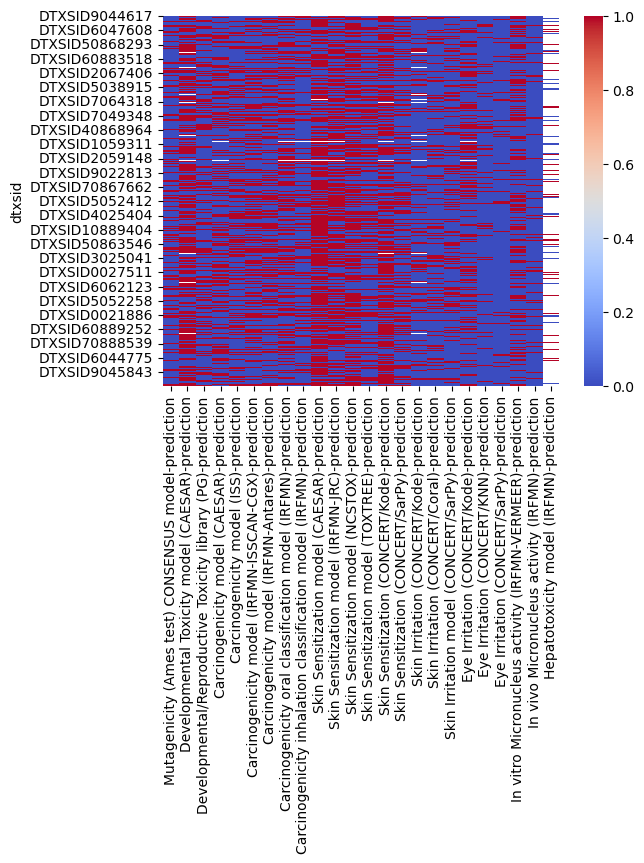

In [229]:
sns.heatmap(vega2.replace(mapping_dict), cmap = 'coolwarm')

In [235]:
vega3 = vega2.replace(mapping_dict)

In [249]:
vega3.to_csv(interim_dir+'vega_binary_130624.csv')

In [6]:
vega3 = pd.read_csv(interim_dir+'vega_binary_130624.csv', index_col = [0])

In [122]:
vega3.columns

Index(['Mutagenicity (Ames test) CONSENSUS model-prediction',
       'Developmental Toxicity model (CAESAR)-prediction',
       'Developmental/Reproductive Toxicity library (PG)-prediction',
       'Carcinogenicity model (CAESAR)-prediction',
       'Carcinogenicity model (ISS)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity model (IRFMN-Antares)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Carcinogenicity inhalation classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'Skin Sensitization model (IRFMN-JRC)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'Skin Sensitization (CONCERT/Kode)-prediction',
       'Skin Sensitization (CONCERT/SarPy)-prediction',
       'Skin Irritation (CONCERT/Kode)-prediction',
       'Skin Irritation (CONCERT/Coral)-prediction',

In [7]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data', index_col = [0])


In [8]:
df['group_str'].nunique()

180

In [9]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [12]:
vega3

Mutagenicity (Ames test) CONSENSUS model-prediction  \
dtxsid                                                                
DTXSID9044617                                                 0.0     
DTXSID40867331                                                0.0     
DTXSID0065199                                                 0.0     
DTXSID90881284                                                1.0     
DTXSID1021900                                                 0.0     
...                                                           ...     
DTXSID3067314                                                 0.0     
DTXSID1063722                                                 1.0     
DTXSID4021975                                                 0.0     
DTXSID2060125                                                 0.0     
DTXSID3051593                                                 1.0     

                Developmental Toxicity model (CAESAR)-prediction  \
dtxsid                                                             
DTXSID9044617                                                1.0   
DTXSID40867331                                               0.0   
DTXSID0065199                                                NaN   
DTXSID90881284                                               0.0   
DTXSID1021900                                                0.0   
...                                                          ...   
DTXSID3067314                                                1.0   
DTXSID1063722                                                1.0   
DTXSID4021975                                                1.0   
DTXSID2060125                                                1.0   
DTXSID3051593                                                0.0   

                Developmental/Reproductive Toxicity library (PG)-prediction  \
dtxsid                                                                        
DTXSID9044617                                                 0.0             
DTXSID40867331                                                0.0             
DTXSID0065199                                                 0.0             
DTXSID90881284                                                0.0             
DTXSID1021900                                                 1.0             
...                                                           ...             
DTXSID3067314                                                 1.0             
DTXSID1063722                                                 1.0             
DTXSID4021975                                                 0.0             
DTXSID2060125                                                 0.0             
DTXSID3051593                                                 0.0             

                Carcinogenicity model (CAESAR)-prediction  \
dtxsid                                                      
DTXSID9044617                                         0.0   
DTXSID40867331                                        0.0   
DTXSID0065199                                         1.0   
DTXSID90881284                                        0.0   
DTXSID1021900                                         0.0   
...                                                   ...   
DTXSID3067314                                         0.0   
DTXSID1063722                                         0.0   
DTXSID4021975                                         0.0   
DTXSID2060125                                         0.0   
DTXSID3051593                                         0.0   

                Carcinogenicity model (ISS)-prediction  \
dtxsid                                                   
DTXSID9044617                                      0.0   
DTXSID40867331                                     0.0   
DTXSID0065199                                      0.0   
DTXSID90881284                                     1.0   
DTXSID1021900                        

In [10]:
alerts_lst = []
for col in vega3.columns.tolist():
    alerts_lst.append([col, vega3[col].sum()])

In [15]:
cols = vega3.columns.tolist()
def chk_sum(s):
    return 100*(s.sum()/len(s))
(vega3
 .pipe(lambda x: chk_sum(x))
)

Mutagenicity (Ames test) CONSENSUS model-prediction                   23.847463
Developmental Toxicity model (CAESAR)-prediction                      59.537438
Developmental/Reproductive Toxicity library (PG)-prediction           30.074257
Carcinogenicity model (CAESAR)-prediction                             38.412748
Carcinogenicity model (ISS)-prediction                                34.282178
Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction                   40.818379
Carcinogenicity model (IRFMN-Antares)-prediction                      36.811572
Carcinogenicity oral classification model (IRFMN)-prediction          44.948948
Carcinogenicity inhalation classification model (IRFMN)-prediction    27.506188
Skin Sensitization model (CAESAR)-prediction                          69.546720
Skin Sensitization model (IRFMN-JRC)-prediction                       55.283106
Skin Sensitization model (NCSTOX)-prediction                          57.758354
Skin Sensitization model (TOXTREE)-predi

In [78]:
#vega3

In [17]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [22]:
#vega3

In [23]:
vega_1 = (vega3.reset_index()
 .assign(group_str = vega3.reset_index()['dtxsid'].replace(mydict ))
 )

In [24]:
vega_1 = (vega_1.assign(final_picks = vega_1['dtxsid'].replace(selections)))
vega_1

dtxsid  Mutagenicity (Ames test) CONSENSUS model-prediction  \
0       DTXSID9044617                                                0.0     
1      DTXSID40867331                                                0.0     
2       DTXSID0065199                                                0.0     
3      DTXSID90881284                                                1.0     
4       DTXSID1021900                                                0.0     
...               ...                                                ...     
12923   DTXSID3067314                                                0.0     
12924   DTXSID1063722                                                1.0     
12925   DTXSID4021975                                                0.0     
12926   DTXSID2060125                                                0.0     
12927   DTXSID3051593                                                1.0     

       Developmental Toxicity model (CAESAR)-prediction  \
0                                                   1.0   
1                                                   0.0   
2                                                   NaN   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
12923                                               1.0   
12924                                               1.0   
12925                                               1.0   
12926                                               1.0   
12927                                               0.0   

       Developmental/Reproductive Toxicity library (PG)-prediction  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                                    0.0             
4                                                    1.0             
...                                                  ...             
12923                                                1.0             
12924                                                1.0             
12925                                                0.0             
12926                                                0.0             
12927                                                0.0             

       Carcinogenicity model (CAESAR)-prediction  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
12923                                        0.0   
12924                                        0.0   
12925                                        0.0   
12926                                        0.0   
12927                                        0.0   

       Carcinogenicity model (ISS)-prediction  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
12923                                     0.0   
12924                                     1.0   
12925                                     0.0   
12926                                     0.0   
12927                                     1.0   

       Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction  \
0                                                    0.0     
1                                                    1.0     
2                                                    0.0     
3                                                    0.0     
4   

In [128]:
vega_1.final_picks.value_counts()

1.0    297
Name: final_picks, dtype: int64

In [130]:
(vega_1
 .where(lambda x: x.final_picks ==1)
.dropna(subset = 'final_picks')
)

Mutagenicity (Ames test) CONSENSUS model-prediction  \
dtxsid                                                                
DTXSID1021900                                                 0.0     
DTXSID7020188                                                 1.0     
DTXSID1063516                                                 1.0     
DTXSID6060264                                                 0.0     
DTXSID20888701                                                0.0     
...                                                           ...     
DTXSID5044942                                                 1.0     
DTXSID5062188                                                 0.0     
DTXSID8047503                                                 0.0     
DTXSID5063520                                                 1.0     
DTXSID1063722                                                 1.0     

                Developmental Toxicity model (CAESAR)-prediction  \
dtxsid                                                             
DTXSID1021900                                                0.0   
DTXSID7020188                                                1.0   
DTXSID1063516                                                1.0   
DTXSID6060264                                                0.0   
DTXSID20888701                                               0.0   
...                                                          ...   
DTXSID5044942                                                1.0   
DTXSID5062188                                                1.0   
DTXSID8047503                                                1.0   
DTXSID5063520                                                0.0   
DTXSID1063722                                                1.0   

                Developmental/Reproductive Toxicity library (PG)-prediction  \
dtxsid                                                                        
DTXSID1021900                                                 1.0             
DTXSID7020188                                                 0.0             
DTXSID1063516                                                 0.0             
DTXSID6060264                                                 0.0             
DTXSID20888701                                                0.0             
...                                                           ...             
DTXSID5044942                                                 0.0             
DTXSID5062188                                                 0.0             
DTXSID8047503                                                 0.0             
DTXSID5063520                                                 0.0             
DTXSID1063722                                                 1.0             

                Carcinogenicity model (CAESAR)-prediction  \
dtxsid                                                      
DTXSID1021900                                         0.0   
DTXSID7020188                                         1.0   
DTXSID1063516                                         1.0   
DTXSID6060264                                         0.0   
DTXSID20888701                                        0.0   
...                                                   ...   
DTXSID5044942                                         0.0   
DTXSID5062188                                         0.0   
DTXSID8047503                                         0.0   
DTXSID5063520                                         1.0   
DTXSID1063722                                         0.0   

                Carcinogenicity model (ISS)-prediction  \
dtxsid                                                   
DTXSID1021900                                      0.0   
DTXSID7020188                                      1.0   
DTXSID1063516                                      1.0   
DTXSID6060264                                      0.0   
DTXSID20888701                       

In [136]:
filtered_sum = (
    vega_1
    .where(lambda x: x['final_picks'] == 1)
    .dropna(subset = 'final_picks')
    .pipe(lambda x: chk_sum(x.select_dtypes(exclude=['object'])))
)

# Compute the sum for the entire DataFrame
total_sum = chk_sum(vega_1.select_dtypes(exclude=['object']))

# Combine the results into a single DataFrame or Series
result = pd.concat([total_sum, filtered_sum], axis=1, keys=['total_sum', 'filtered_sum']).stack()
result.to_csv(interim_dir+'vega_props.csv')

In [134]:
(result
 .reset_index()
 .rename(columns = {'level_1': 'VEGA % counts', 'level_0': 'Endpoint-Model'})
 .pivot(index = 'Endpoint-Model', columns = 'VEGA % counts', values = 0)
 .drop('final_picks')
 .plot(kind = 'barh').legend(loc = 'best', bbox_to_anchor=(1, 1))
)

In [135]:
'''(vega_1
.pipe(lambda x: chk_sum(x.select_dtypes(exclude=['object']) ))
 .drop('final_picks')
)

SyntaxError: EOF while scanning triple-quoted string literal (1400994409.py, line 4)

In [25]:
vega_1 = (vega_1
 .set_index('dtxsid')
         )

In [27]:
results = {}
for i, group in vega_1.groupby('group_str'):
    results[i] = group.iloc[:,:-2]

In [28]:
import sys

In [29]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [30]:
from model_functions import *

In [33]:
#results["('Acetylides', nan)"]

In [34]:
dists = {}
for k, v in results.items():
    dists[k] = distance_matrix(v)

In [35]:
import pickle
pickle.dump( dists, open(interim_dir+ "dists_vega_250624.pkl", "wb" ) )

In [36]:
f, ax = plt.subplots(2,2, figsize = (20,20))
sns.heatmap(dists["('Pyridines and derivatives', 1.0)"], cmap = 'coolwarm', ax = ax[0,0])
sns.heatmap(dists["('Benzene and substituted derivatives', 9.0)"], cmap = 'coolwarm', ax = ax[0,1])
sns.heatmap(dists["('Quinolines and derivatives', 3.0)"], cmap = 'coolwarm', ax = ax[1,0])
sns.heatmap(dists["('Lactones', nan)"], cmap = 'coolwarm', ax = ax[1,1])

<Axes: xlabel='dtxsid', ylabel='dtxsid'>

In [37]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(dists["('Pyridines and derivatives', 1.0)"]), method='ward')

In [38]:
test = dists["('Pyridines and derivatives', 1.0)"] 

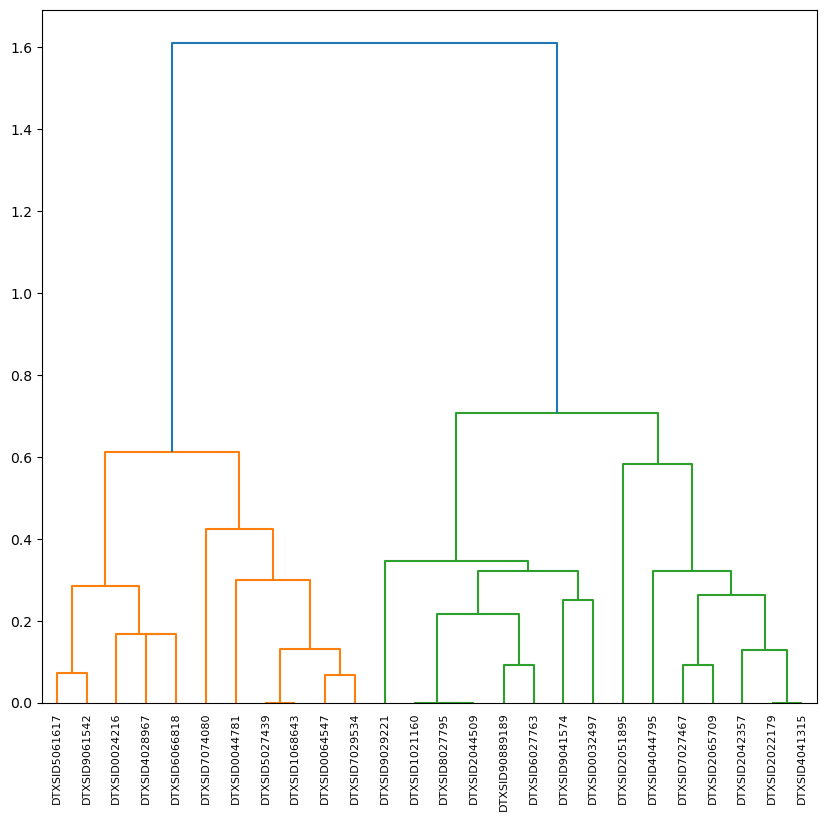

In [39]:
plt.figure(figsize=(10, 9))
dendrogram(
    linkage,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = test.index# font size for the x axis labels
)
plt.show()

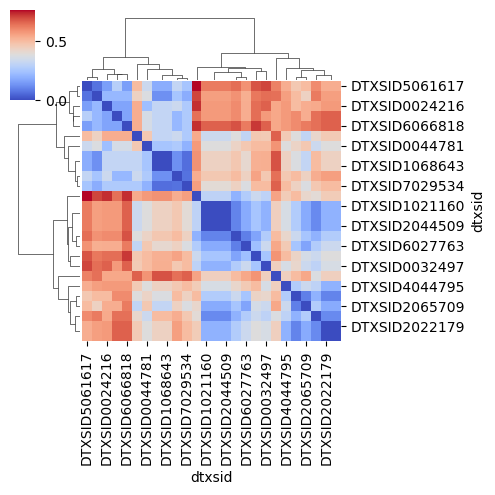

In [40]:
g = sns.clustermap(dists["('Pyridines and derivatives', 1.0)"], row_linkage=linkage, col_linkage=linkage, cmap = 'coolwarm', figsize = (5,5))

In [41]:
from scipy.cluster.hierarchy import fcluster

In [99]:
fcluster(linkage, t=0.7, criterion='distance')

array([2, 2, 2, 1, 1, 3, 3, 3, 3, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2,
       3, 1, 1, 3], dtype=int32)

In [100]:
clusters = pd.DataFrame(list(zip(test.index, fcluster(linkage, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])

In [101]:
clusters = clusters.sort_values(by= 'cluster_d', ascending = True)

In [102]:
clusters_df = pd.merge(results["('Pyridines and derivatives', 1.0)"], clusters, left_on = results["('Pyridines and derivatives', 1.0)"].index, right_on = 'dtxsid', how = 'left')

In [137]:
clusters_df.to_csv(interim_dir+'vega_pyridines_deriv.csv')

In [104]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==1]).eq(1).any()]

Index(['Mutagenicity (Ames test) CONSENSUS model-prediction',
       'Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (CAESAR)-prediction',
       'Carcinogenicity model (ISS)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity model (IRFMN-Antares)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'Skin Sensitization model (IRFMN-JRC)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'Skin Sensitization (CONCERT/Kode)-prediction',
       'Skin Irritation (CONCERT/Coral)-prediction',
       'Skin Irritation model (CONCERT/SarPy)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction', 'cluster_d'],
      dtype='object')

In [107]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==1]).eq(1).all()]

Index(['Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity model (IRFMN-Antares)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction', 'cluster_d'],
      dtype='object')

In [108]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==2]).eq(1).any()]

Index(['Developmental Toxicity model (CAESAR)-prediction',
       'Developmental/Reproductive Toxicity library (PG)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Carcinogenicity inhalation classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'Skin Sensitization model (IRFMN-JRC)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'Skin Sensitization (CONCERT/Kode)-prediction',
       'Eye Irritation (CONCERT/Kode)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [109]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==2]).eq(1).all()]

Index(['Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Skin Sensitization model (IRFMN-JRC)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [110]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==3]).eq(1).any()]

Index(['Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (CAESAR)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity model (IRFMN-Antares)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'Skin Sensitization model (IRFMN-JRC)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'Skin Sensitization (CONCERT/Kode)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [111]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==3]).eq(1).all()]

Index(['Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [114]:
mols = {k:v for k,v in zip(df['dtxsid'], df['smiles'])}
clusters_df['SMILES'] = clusters_df['dtxsid'].apply(lambda x: mols[x])

In [116]:
#clusters_df

In [117]:
mols_cluster_1 = [Chem.MolFromSmiles(e) for e in clusters_df[clusters_df['cluster_d'] == 1]['SMILES']]
mols_cluster_2 = [Chem.MolFromSmiles(e) for e in clusters_df[clusters_df['cluster_d'] == 2]['SMILES']]
mols_cluster_3 = [Chem.MolFromSmiles(e) for e in clusters_df[clusters_df['cluster_d'] == 3]['SMILES']]

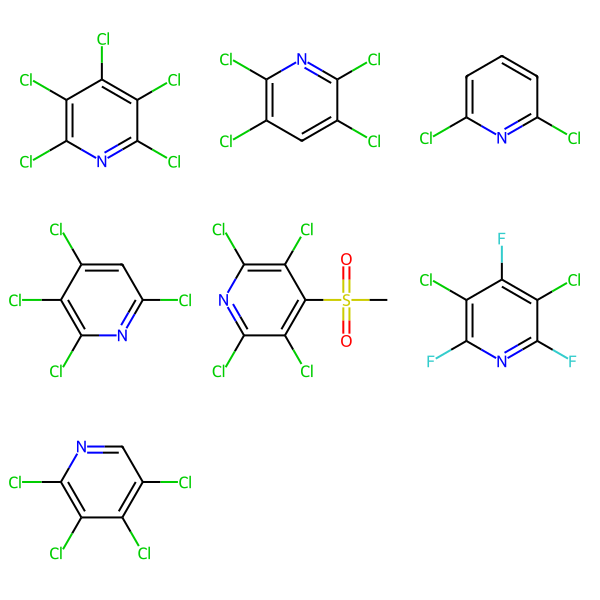

In [120]:
from rdkit.Chem.Draw import MolsToGridImage
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image
import io

Draw.MolsToGridImage(mols_cluster_3)

In [138]:
linkage_c = hc.linkage(sp.distance.squareform(dists["('Quinolines and derivatives', 3.0)"]), method='ward')

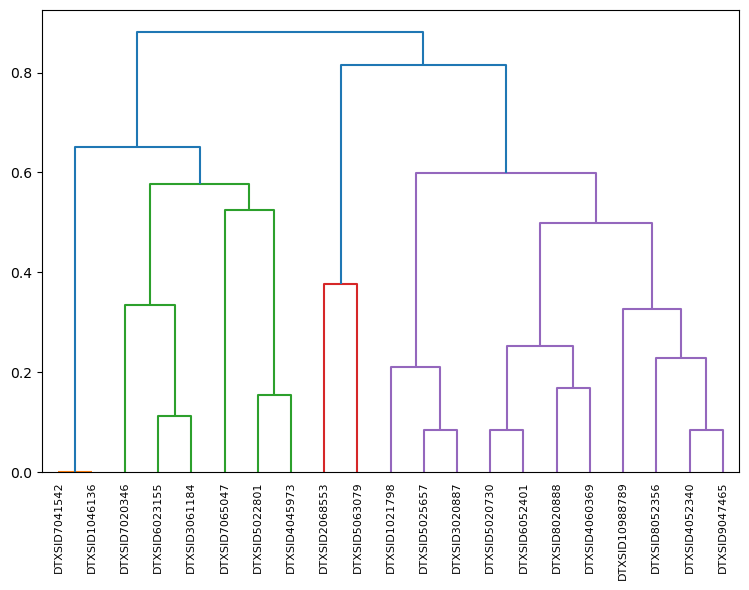

In [139]:
plt.figure(figsize=(9, 6))
dendrogram(
    linkage_c,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = dists["('Quinolines and derivatives', 3.0)"].index# font size for the x axis labels
);

In [140]:
clusters_c = pd.DataFrame(list(zip(dists["('Quinolines and derivatives', 3.0)"].index, fcluster(linkage_c, t=0.6, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])

In [141]:
clusters_c_df = pd.merge(results["('Quinolines and derivatives', 3.0)"], clusters_c, left_on = results["('Quinolines and derivatives', 3.0)"].index, right_on = 'dtxsid', how = 'left')


In [147]:
clusters_c_df.to_csv(interim_dir+'vega_quinolines_derivs.csv')

In [151]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==1]).eq(1).all()]

Index(['Mutagenicity (Ames test) CONSENSUS model-prediction',
       'Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Carcinogenicity inhalation classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'Skin Sensitization model (IRFMN-JRC)-prediction',
       'Skin Sensitization (CONCERT/Kode)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction', 'cluster_d'],
      dtype='object')

In [150]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==2]).eq(1).all()]

Index(['Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Eye Irritation (CONCERT/Kode)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [149]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==3]).eq(1).all()]

Index(['Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (CAESAR)-prediction',
       'Carcinogenicity model (ISS)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity model (IRFMN-Antares)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'Eye Irritation (CONCERT/Kode)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [148]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==4]).eq(1).all()]

Index(['Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity oral classification model (IRFMN)-prediction',
       'Skin Sensitization model (CAESAR)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Hepatotoxicity model (IRFMN)-prediction'],
      dtype='object')

In [152]:
[e for e in df.group_str.unique().tolist() if e not in results.keys()]

[nan, "('Nucleosides, nucleotides, and analogues', nan)"]

In [154]:
#df

In [155]:
def clust_output(d, r, label = None):
    link = hc.linkage(sp.distance.squareform(d[label]), method='ward')
    clust = pd.DataFrame(list(zip(dists[label].index, fcluster(link, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])
    clust_df = pd.merge(r[label], clust, left_on = r[label].index, right_on = 'dtxsid', how = 'left')
    return clust_df
    

In [156]:
def clust_out(clust_df, label = None):
    n = clust_df.cluster_d.nunique()
    alerts = {}
    for i in range(1, n):
        alerts[i] = clust_df.columns[(clust_df[clust_df['cluster_d'] ==n]).eq(1).any()]
    return   alerts

In [157]:
summaries = {}
for e in results.keys():
    try:
        summaries[e] = clust_output(dists, results, label = e)
    except Exception as error:
        print(e)

('Lipids and lipid-like molecules', nan)


In [158]:
alert_dict = {}
for e in summaries.keys():
    alert_dict[e] = clust_out(summaries[e])

In [160]:
len({k:len(v) for k, v in alert_dict.items() if len(v) == 0})

16

In [161]:
{k:len(v) for k, v in alert_dict.items() if len(v) == 0}

{"('Allenes', nan)": 0,
 "('Anthracenes', 2.0)": 0,
 "('Anthracenes', 3.0)": 0,
 "('Anthracenes', 5.0)": 0,
 "('Azobenzenes', 1.0)": 0,
 "('Azobenzenes', 2.0)": 0,
 "('Azobenzenes', 5.0)": 0,
 "('Azobenzenes', 6.0)": 0,
 "('Azobenzenes', 7.0)": 0,
 "('Azoles', 3.0)": 0,
 "('Benzenoids', 5.0)": 0,
 "('Lignans, neolignans and related compounds', nan)": 0,
 "('Organic oxygen compounds', nan)": 0,
 "('Organoheterocyclic compounds', 2.0)": 0,
 "('Quinolines and derivatives', 1.0)": 0,
 "('Quinolines and derivatives', 2.0)": 0}

In [171]:
results["('Azobenzenes', 5.0)"]

Mutagenicity (Ames test) CONSENSUS model-prediction  \
dtxsid                                                                
DTXSID8027539                                                 1.0     
DTXSID8072873                                                 1.0     
DTXSID6067173                                                 1.0     
DTXSID2068894                                                 1.0     
DTXSID5044524                                                 1.0     
DTXSID0063103                                                 1.0     
DTXSID60889116                                                1.0     
DTXSID3071800                                                 1.0     
DTXSID8068678                                                 1.0     
DTXSID6067202                                                 1.0     
DTXSID6069117                                                 1.0     
DTXSID9051876                                                 1.0     
DTXSID3070547                                                 1.0     

                Developmental Toxicity model (CAESAR)-prediction  \
dtxsid                                                             
DTXSID8027539                                                0.0   
DTXSID8072873                                                1.0   
DTXSID6067173                                                1.0   
DTXSID2068894                                                1.0   
DTXSID5044524                                                0.0   
DTXSID0063103                                                0.0   
DTXSID60889116                                               0.0   
DTXSID3071800                                                1.0   
DTXSID8068678                                                1.0   
DTXSID6067202                                                0.0   
DTXSID6069117                                                1.0   
DTXSID9051876                                                1.0   
DTXSID3070547                                                1.0   

                Developmental/Reproductive Toxicity library (PG)-prediction  \
dtxsid                                                                        
DTXSID8027539                                                 0.0             
DTXSID8072873                                                 1.0             
DTXSID6067173                                                 0.0             
DTXSID2068894                                                 0.0             
DTXSID5044524                                                 0.0             
DTXSID0063103                                                 0.0             
DTXSID60889116                                                0.0             
DTXSID3071800                                                 0.0             
DTXSID8068678                                                 0.0             
DTXSID6067202                                                 0.0             
DTXSID6069117                                                 0.0             
DTXSID9051876                                                 0.0             
DTXSID3070547                                                 0.0             

                Carcinogenicity model (CAESAR)-prediction  \
dtxsid                                                      
DTXSID8027539                                         1.0   
DTXSID8072873                                         1.0   
DTXSID6067173                                         1.0   
DTXSID2068894                                         1.0   
DTXSID5044524                                         1.0   
DTXSID0063103                                         1.0   
DTXSID60889116                                        1.0   
DTXSID3071800                                         1.0   
DTXSID8068678                                         1.0   
DTXSID6067202                                         1.0   
DTXSID60691

In [167]:
for k, v in alert_dict.items():
    if len(v) ==0:
        print(k, results[k].shape)

('Allenes', nan) (2, 24)
('Anthracenes', 2.0) (11, 24)
('Anthracenes', 3.0) (23, 24)
('Anthracenes', 5.0) (16, 24)
('Azobenzenes', 1.0) (6, 24)
('Azobenzenes', 2.0) (16, 24)
('Azobenzenes', 5.0) (13, 24)
('Azobenzenes', 6.0) (23, 24)
('Azobenzenes', 7.0) (15, 24)
('Azoles', 3.0) (4, 24)
('Benzenoids', 5.0) (13, 24)
('Lignans, neolignans and related compounds', nan) (4, 24)
('Organic oxygen compounds', nan) (6, 24)
('Organoheterocyclic compounds', 2.0) (12, 24)
('Quinolines and derivatives', 1.0) (6, 24)
('Quinolines and derivatives', 2.0) (11, 24)


In [172]:
for k,v in alert_dict.items():
    if len(v) ==0:
        if len(results[k].columns[results[k].eq(1).any()]) == 0:
            print(k, results[k].columns[results[k].eq(1).any()])

In [173]:
for k,v in alert_dict.items():
    if len(v) ==0:
        if len(results[k].columns[results[k].eq(1).any()]) != 0:
            print(k, len(results[k].columns[results[k].eq(1).any()]), results[k].shape[0])

('Allenes', nan) 6 2
('Anthracenes', 2.0) 15 11
('Anthracenes', 3.0) 18 23
('Anthracenes', 5.0) 17 16
('Azobenzenes', 1.0) 17 6
('Azobenzenes', 2.0) 19 16
('Azobenzenes', 5.0) 15 13
('Azobenzenes', 6.0) 17 23
('Azobenzenes', 7.0) 19 15
('Azoles', 3.0) 13 4
('Benzenoids', 5.0) 17 13
('Lignans, neolignans and related compounds', nan) 18 4
('Organic oxygen compounds', nan) 12 6
('Organoheterocyclic compounds', 2.0) 17 12
('Quinolines and derivatives', 1.0) 15 6
('Quinolines and derivatives', 2.0) 17 11


In [176]:
results["('Anthracenes', 5.0)"].columns[results["('Anthracenes', 5.0)"].eq(1).all()]

Index(['Mutagenicity (Ames test) CONSENSUS model-prediction',
       'Developmental Toxicity model (CAESAR)-prediction',
       'Carcinogenicity model (ISS)-prediction',
       'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction',
       'Carcinogenicity model (IRFMN-Antares)-prediction',
       'Carcinogenicity inhalation classification model (IRFMN)-prediction',
       'Skin Sensitization model (NCSTOX)-prediction',
       'Skin Sensitization model (TOXTREE)-prediction',
       'Eye Irritation (CONCERT/SarPy)-prediction',
       'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction'],
      dtype='object')

In [187]:
(pd.DataFrame([[k, len(v)] for k, v in alert_dict.items() if len(v) != 0], columns = ['terminal_category', 'number of positive predictions'])
 .sort_values(by =  'number of positive predictions', ascending = True)
 
).to_csv(interim_dir+'vegacount_terminalcategories.csv')

In [179]:
pd.DataFrame([[k, len(v)] for k, v in alert_dict.items() if len(v) != 0]).describe()

1
count  162.000000
mean    16.950617
std     20.682096
min      1.000000
25%      4.250000
50%      9.000000
75%     18.500000
max    111.000000

In [192]:
all_alerts = (vega_1
 .columns[vega_1.eq(1).any()].tolist()[:-1]
)

In [223]:

res =[e.split('model')[0] for e in all_alerts]
    
    

In [224]:
res

['Mutagenicity (Ames test) CONSENSUS ',
 'Developmental Toxicity ',
 'Developmental/Reproductive Toxicity library (PG)-prediction',
 'Carcinogenicity ',
 'Carcinogenicity ',
 'Carcinogenicity ',
 'Carcinogenicity ',
 'Carcinogenicity oral classification ',
 'Carcinogenicity inhalation classification ',
 'Skin Sensitization ',
 'Skin Sensitization ',
 'Skin Sensitization ',
 'Skin Sensitization ',
 'Skin Sensitization (CONCERT/Kode)-prediction',
 'Skin Sensitization (CONCERT/SarPy)-prediction',
 'Skin Irritation (CONCERT/Kode)-prediction',
 'Skin Irritation (CONCERT/Coral)-prediction',
 'Skin Irritation ',
 'Eye Irritation (CONCERT/Kode)-prediction',
 'Eye Irritation (CONCERT/KNN)-prediction',
 'Eye Irritation (CONCERT/SarPy)-prediction',
 'In vitro Micronucleus activity (IRFMN-VERMEER)-prediction',
 'In vivo Micronucleus activity (IRFMN)-prediction',
 'Hepatotoxicity ']

In [225]:
res1 = []
for e in res:
    if 'CONCERT' in e:
        res1.append(e.split('(CONCERT')[0])
    elif 'CONSENSUS' in e:
        res1.append(e.split('CONSENSUS')[0])
    elif 'IRFMN' in e:
        res1.append(e.split('(IRFMN')[0])
    elif 'library' in e:
        res1.append(e.split('library')[0])
    else:
        res1.append(e)

In [229]:
res1 = [e.strip() for e in res1]

In [240]:
res1 = list(set(res1))

In [234]:
group_str_dict = {k:list(v.index) for k,v in vega_1.groupby('group_str')}

In [241]:
new_df = pd.DataFrame(columns = res1, index = group_str_dict.keys())

In [243]:
#new_df

In [274]:
alert_dict2 = {}
for y in all_alerts:
    for e in res1:
        if e in y:
            alert_dict2[y] = e

In [296]:
reversed_dict = {}
for key, value in alert_dict2.items():
    if value not in reversed_dict:
        reversed_dict[value] = []
    reversed_dict[value].append(key)

In [291]:
res1

['Carcinogenicity inhalation classification',
 'Skin Sensitization',
 'Eye Irritation',
 'In vivo Micronucleus activity',
 'In vitro Micronucleus activity',
 'Carcinogenicity',
 'Mutagenicity (Ames test)',
 'Skin Irritation',
 'Developmental/Reproductive Toxicity',
 'Developmental Toxicity',
 'Carcinogenicity oral classification',
 'Hepatotoxicity']

In [293]:
alert_dict2['Carcinogenicity inhalation classification model (IRFMN)-prediction'] = 'Carcinogenicity inhalation classification'

In [294]:
alert_dict2

{'Mutagenicity (Ames test) CONSENSUS model-prediction': 'Mutagenicity (Ames test)',
 'Developmental Toxicity model (CAESAR)-prediction': 'Developmental Toxicity',
 'Developmental/Reproductive Toxicity library (PG)-prediction': 'Developmental/Reproductive Toxicity',
 'Carcinogenicity model (CAESAR)-prediction': 'Carcinogenicity',
 'Carcinogenicity model (ISS)-prediction': 'Carcinogenicity',
 'Carcinogenicity model (IRFMN-ISSCAN-CGX)-prediction': 'Carcinogenicity',
 'Carcinogenicity model (IRFMN-Antares)-prediction': 'Carcinogenicity',
 'Carcinogenicity oral classification model (IRFMN)-prediction': 'Carcinogenicity oral classification',
 'Carcinogenicity inhalation classification model (IRFMN)-prediction': 'Carcinogenicity inhalation classification',
 'Skin Sensitization model (CAESAR)-prediction': 'Skin Sensitization',
 'Skin Sensitization model (IRFMN-JRC)-prediction': 'Skin Sensitization',
 'Skin Sensitization model (NCSTOX)-prediction': 'Skin Sensitization',
 'Skin Sensitization mod

In [297]:
for row in new_df.index:
    for col in new_df.columns:
        a = vega_1[vega_1['group_str'] ==row][reversed_dict[col]].sum(axis = 1).sum()
        new_df.loc[row,col] = a


In [298]:
new_df

Carcinogenicity inhalation classification  \
('Acetylides', nan)                                                             8.0   
('Alkaloids and derivatives', nan)                                              1.0   
('Allenes', nan)                                                                2.0   
('Anthracenes', 1.0)                                                           15.0   
('Anthracenes', 2.0)                                                           11.0   
...                                                                             ...   
('Quinolines and derivatives', 4.0)                                            32.0   
('Quinolines and derivatives', 5.0)                                             6.0   
('Steroids and steroid derivatives', nan)                                       3.0   
('Triazines', nan)                                                             10.0   
('Triphenyl compounds', nan)                                                   25.0   

                                          Skin Sensitization Eye Irritation  \
('Acetylides', nan)                                    106.0           11.0   
('Alkaloids and derivatives', nan)                       5.0            0.0   
('Allenes', nan)                                         3.0            0.0   
('Anthracenes', 1.0)                                    64.0            3.0   
('Anthracenes', 2.0)                                    43.0            8.0   
...                                                      ...            ...   
('Quinolines and derivatives', 4.0)                    114.0           18.0   
('Quinolines and derivatives', 5.0)                     52.0            8.0   
('Steroids and steroid derivatives', nan)               21.0            0.0   
('Triazines', nan)                                     129.0           21.0   
('Triphenyl compounds', nan)                            84.0           13.0   

                                          In vivo Micronucleus activity  \
('Acetylides', nan)                                                 1.0   
('Alkaloids and derivatives', nan)                                  0.0   
('Allenes', nan)                                                    0.0   
('Anthracenes', 1.0)                                                4.0   
('Anthracenes', 2.0)                                                0.0   
...                                                                 ...   
('Quinolines and derivatives', 4.0)                                 9.0   
('Quinolines and derivatives', 5.0)                                 0.0   
('Steroids and steroid derivatives', nan)                           0.0   
('Triazines', nan)                                                 10.0   
('Triphenyl compounds', nan)                                       10.0   

                                          In vitro Micronucleus activity  \
('Acetylides', nan)                                                  1.0   
('Alkaloids and derivatives', nan)                                   1.0   
('Allenes', nan)                                                     0.0   
('Anthracenes', 1.0)                                                15.0   
('Anthracenes', 2.0)                                                11.0   
...                                                                  ...   
('Quinolines and derivatives', 4.0)                                 41.0   
('Quinolines and derivatives', 5.0)                                 10.0   
('Steroids and steroid derivatives', nan)                            0.0   
('Triazines', nan)                                                  16.0   
('Triphenyl compounds', nan)                                        24.0   

                                          Carcinogenicity  \
('Acetylides', nan)                                  67.0   
('Alkaloids and derivatives', nan)                    2.0   
('Allenes', nan)                                   

In [299]:
new_df.to_csv(interim_dir+'vega_map.csv')

<Axes: >

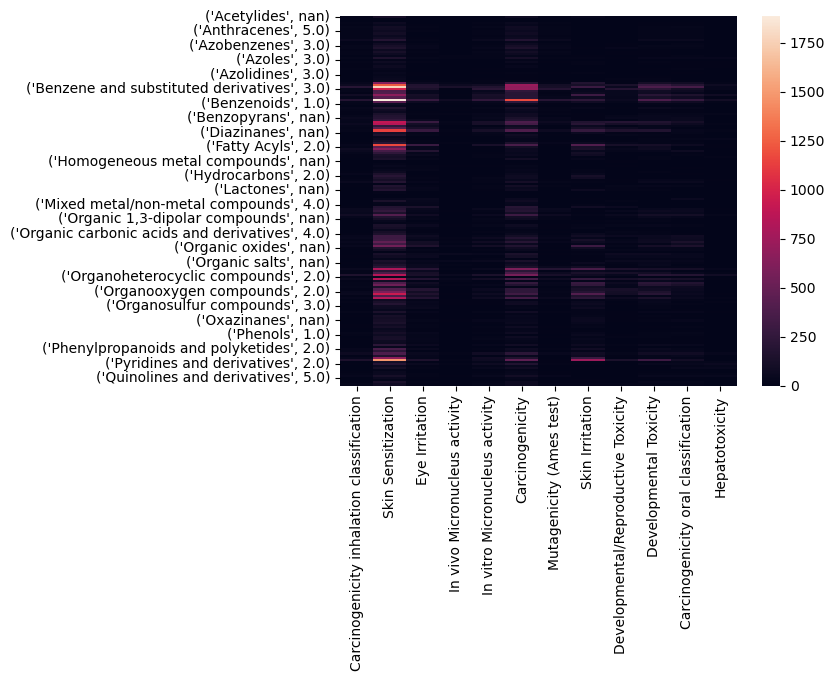

In [304]:
sns.heatmap(new_df.astype(float))

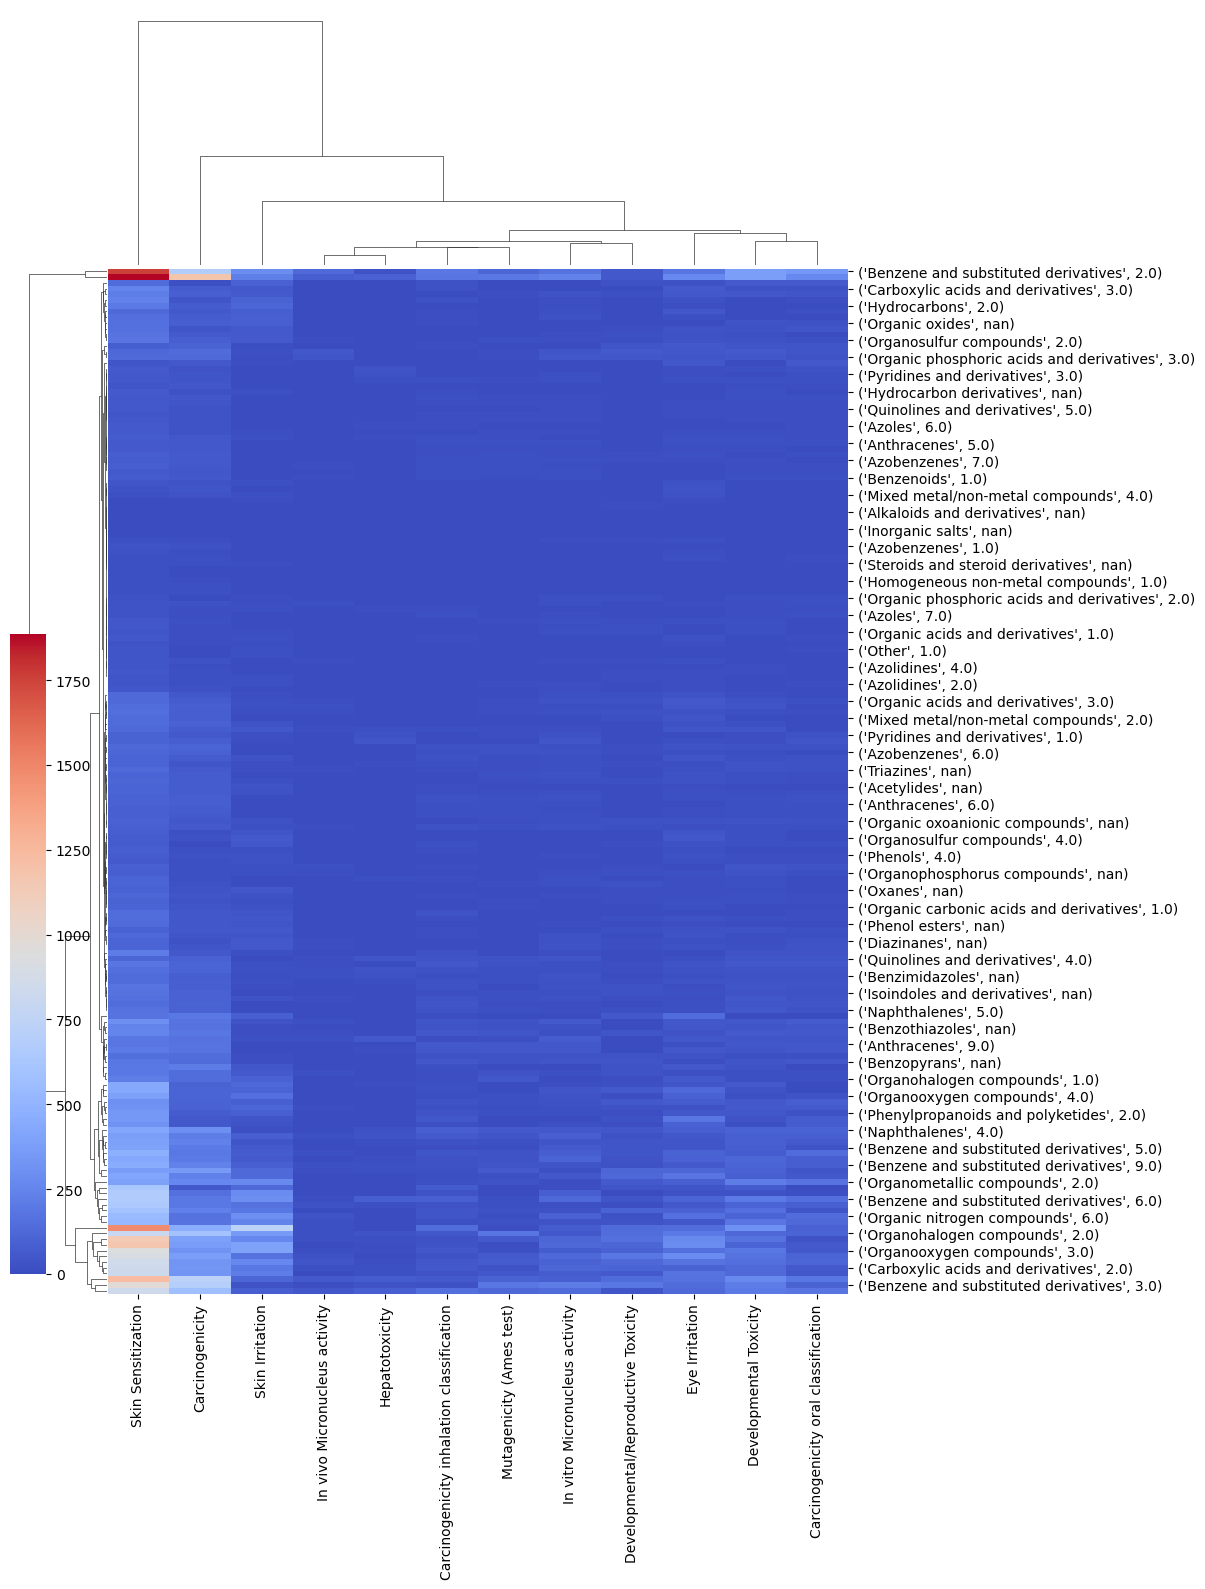

In [305]:
sns.clustermap(new_df.astype(float), 
               cmap='coolwarm',  # Choose the colormap
               figsize=(12,16),  # Figure size
               row_cluster=True,  # Cluster rows
               col_cluster=True,  # Cluster columns
               dendrogram_ratio=(.1, .2),  # Adjust the ratio of dendrogram height
               #linewidths=0.5,  # Width of lines dividing each cell
              # linecolor='grey',  # Color of lines dividing each cell
               cbar_pos=(0, .2, .03, .4),  # Position of colorbar
               # Label for colorbar
               method='average') 

In [306]:
most_endpoints = {}
for col in new_df.columns:
    a = new_df[new_df[col] >50].index
    if len(a) >=1:
        most_endpoints[col] = a

In [312]:
most_endpoints

{'Carcinogenicity inhalation classification': Index(['('Anthracenes', 9.0)', '('Benzene and substituted derivatives', 10.0)',
        '('Benzene and substituted derivatives', 2.0)',
        '('Benzene and substituted derivatives', 6.0)',
        '('Benzene and substituted derivatives', 8.0)',
        '('Carboxylic acids and derivatives', 2.0)', '('Fatty Acyls', 3.0)',
        '('Naphthalenes', 2.0)', '('Naphthalenes', 4.0)',
        '('Organohalogen compounds', 2.0)',
        '('Organoheterocyclic compounds', 1.0)',
        '('Phenylpropanoids and polyketides', 4.0)', '('Prenol lipids', 2.0)'],
       dtype='object'),
 'Skin Sensitization': Index(['('Acetylides', nan)', '('Anthracenes', 1.0)', '('Anthracenes', 3.0)',
        '('Anthracenes', 4.0)', '('Anthracenes', 5.0)', '('Anthracenes', 6.0)',
        '('Anthracenes', 7.0)', '('Anthracenes', 8.0)', '('Anthracenes', 9.0)',
        '('Azobenzenes', 2.0)',
        ...
        '('Pyridines and derivatives', 1.0)',
        '('Pyridines an

In [308]:
{k:len(v) for k,v in most_endpoints.items()}

{'Carcinogenicity inhalation classification': 13,
 'Skin Sensitization': 141,
 'Eye Irritation': 38,
 'In vivo Micronucleus activity': 3,
 'In vitro Micronucleus activity': 24,
 'Carcinogenicity': 104,
 'Mutagenicity (Ames test)': 11,
 'Skin Irritation': 52,
 'Developmental/Reproductive Toxicity': 21,
 'Developmental Toxicity': 37,
 'Carcinogenicity oral classification': 33,
 'Hepatotoxicity': 5}

In [309]:
top_cats = pd.DataFrame(list(most_endpoints.items()))
top_cat = top_cats.explode(1)

# Explode the 'Values' column
top_cat.columns = ['Endpoint', 'Terminal_Category']
top_cat

Endpoint  \
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
..                                        ...   
11                             Hepatotoxicity   
11                             Hepatotoxicity   
11                             Hepatotoxicity   
11                             Hepatotoxicity   
11                             Hepatotoxicity   

                                Terminal_Category  
0                            ('Anthracenes', 9.0)  
0   ('Benzene and substituted derivatives', 10.0)  
0    ('Benzene and substituted derivatives', 2.0)  
0    ('Benzene and substituted derivatives', 6.0)  
0    ('Benzene and substituted derivatives', 8.0)  
..                                            ...  
11  ('Benzene and substituted derivatives', 10.0)  
11   ('Benzene and substituted derivatives', 6.0)  
11   ('Benzene and substituted derivatives', 8.0)  
11          ('Organoheterocyclic compounds', 1.0)  
11             ('Pyridines and derivatives', 2.0)  

[482 rows x 2 columns]

In [314]:
top_cat

Endpoint  \
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
0   Carcinogenicity inhalation classification   
..                                        ...   
11                             Hepatotoxicity   
11                             Hepatotoxicity   
11                             Hepatotoxicity   
11                             Hepatotoxicity   
11                             Hepatotoxicity   

                                Terminal_Category  
0                            ('Anthracenes', 9.0)  
0   ('Benzene and substituted derivatives', 10.0)  
0    ('Benzene and substituted derivatives', 2.0)  
0    ('Benzene and substituted derivatives', 6.0)  
0    ('Benzene and substituted derivatives', 8.0)  
..                                            ...  
11  ('Benzene and substituted derivatives', 10.0)  
11   ('Benzene and substituted derivatives', 6.0)  
11   ('Benzene and substituted derivatives', 8.0)  
11          ('Organoheterocyclic compounds', 1.0)  
11             ('Pyridines and derivatives', 2.0)  

[482 rows x 2 columns]

In [313]:
import networkx as nx
import matplotlib.pyplot as plt 
import ast

In [316]:
import re

def extract_alpha(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [317]:
top_cat['Category']= top_cat['Terminal_Category'].apply(lambda x: extract_alpha(x))

In [318]:
top_cat['Category'] = [e.strip(' ').replace('nan','').rstrip(' ')  for e in top_cat['Category']]

In [320]:
mydict2 = {k:v for k,v in zip(set(top_cat['Category']), set(top_cat['Category']))}

In [322]:
mydict2 = {'Organosulfur compounds': 'Organosulfur',
 'Benzothiazoles': 'Benzothiazoles',
 'Ligs  neoligs and related compounds': 'Ligs/neoligs',
 'Lipids and lipid like molecules': 'Lipids and lipid like',
 'Pyridines and derivatives': 'Pyridine deriv',
 'Organic oxygen compounds': 'Organic oxygen',
 'Naphthalenes': 'Naphthalenes',
 'Piperidines': 'Piperidines',
 'Phenol ethers': 'Phenol ethers',
 'Anthracenes': 'Anthracenes',
 'Nucleosides  nucleotides  and analogues': 'Nucleosides/nucleotides',
 'Allenes': 'Allenes',
 'Keto acids and derivatives': 'Keto acid deriv',
 'Benzenoids': 'Benzenoids',
 'Mixed metal non metal compounds': 'Mixed metal/non metal',
 'Organometallic compounds': 'Organometallic compounds',
 'Organic carbonic acids and derivatives': 'Organic carbonic acid deriv',
 'Phenols': 'Phenols',
 'Benzimidazoles': 'Benzimidazoles',
 'Organic salts': 'Organic salts',
 'Organic acids and derivatives': 'Organic acid deriv',
 'Diazies': 'Diazies',
 'Organic oxoanionic compounds': 'Organic oxoanionic',
 'Steroids and steroid derivatives': 'Steroid deriv',
 'Azobenzenes': 'Azobenzenes',
 'Carboxylic acids and derivatives': 'COOH deriv',
 'Organic     dipolar compounds': 'Organic dipolar',
 'Indanes': 'Indanes',
 'Hydrocarbons': 'Hydrocarbons',
 'Epoxides': 'Epoxides',
 'Diazines': 'Diazines',
 'Organohalogen compounds': 'Organohalogen',
 'Acetylides': 'Acetylides',
 'Triazines': 'Triazines',
 'Homogeneous non metal compounds': 'Homogeneous non metal',
 'Benzene and substituted derivatives': 'Benzene substituted deriv',
 'Alkaloids and derivatives': 'Alkaloid deriv',
 'Quinolines and derivatives': 'Quinolines deriv',
 'Glycerolipids': 'Glycerolipids',
 'Azolidines': 'Azolidines',
 'Hydrocarbon derivatives': 'Hydrocarbons',
 'Phenol esters': 'Phenol esters',
 'Oxazies': 'Oxazies',
 'Prenol lipids': 'Prenol lipids',
 'Oxanes': 'Oxanes',
 'Fatty Acyls': 'Fatty Acyls',
 'Organoheterocyclic compounds': 'Organoheterocyclic',
 'Indoles and derivatives': 'Indoles deriv',
 'Organic oxides': 'Organic oxides',
 'Triphenyl compounds': 'Triphenyl',
 'Azoles': 'Azoles',
 'Organic nitrogen compounds': 'Organic nitrogen',
 'Phenylpropanoids and polyketides': 'Phenylpropanoids and polyketides',
 'Dioxanes': 'Dioxanes',
 'Organic phosphonic acids and derivatives': 'Organic phosphonic acids deriv',
 'Organic sulfonic acids and derivatives': 'Organic sulfonic acids deriv',
 'Benzofurans': 'Benzofurans',
 'Heteroaromatic compounds': 'Heteroaromatic',
 'Benzopyrans': 'Benzopyrans',
 'Lactones': 'Lactones',
 'Other': 'Other',
 'Organic phosphoric acids and derivatives': 'Organic phosphoric acid  deriv',
 'Organophosphorus compounds': 'Organophosphorus',
 'Isoindoles and derivatives': 'Isoindoles deriv',
 'Organooxygen compounds': 'Organooxygen'}

In [323]:
top_cat['Category2'] = top_cat['Category'].replace(mydict2)

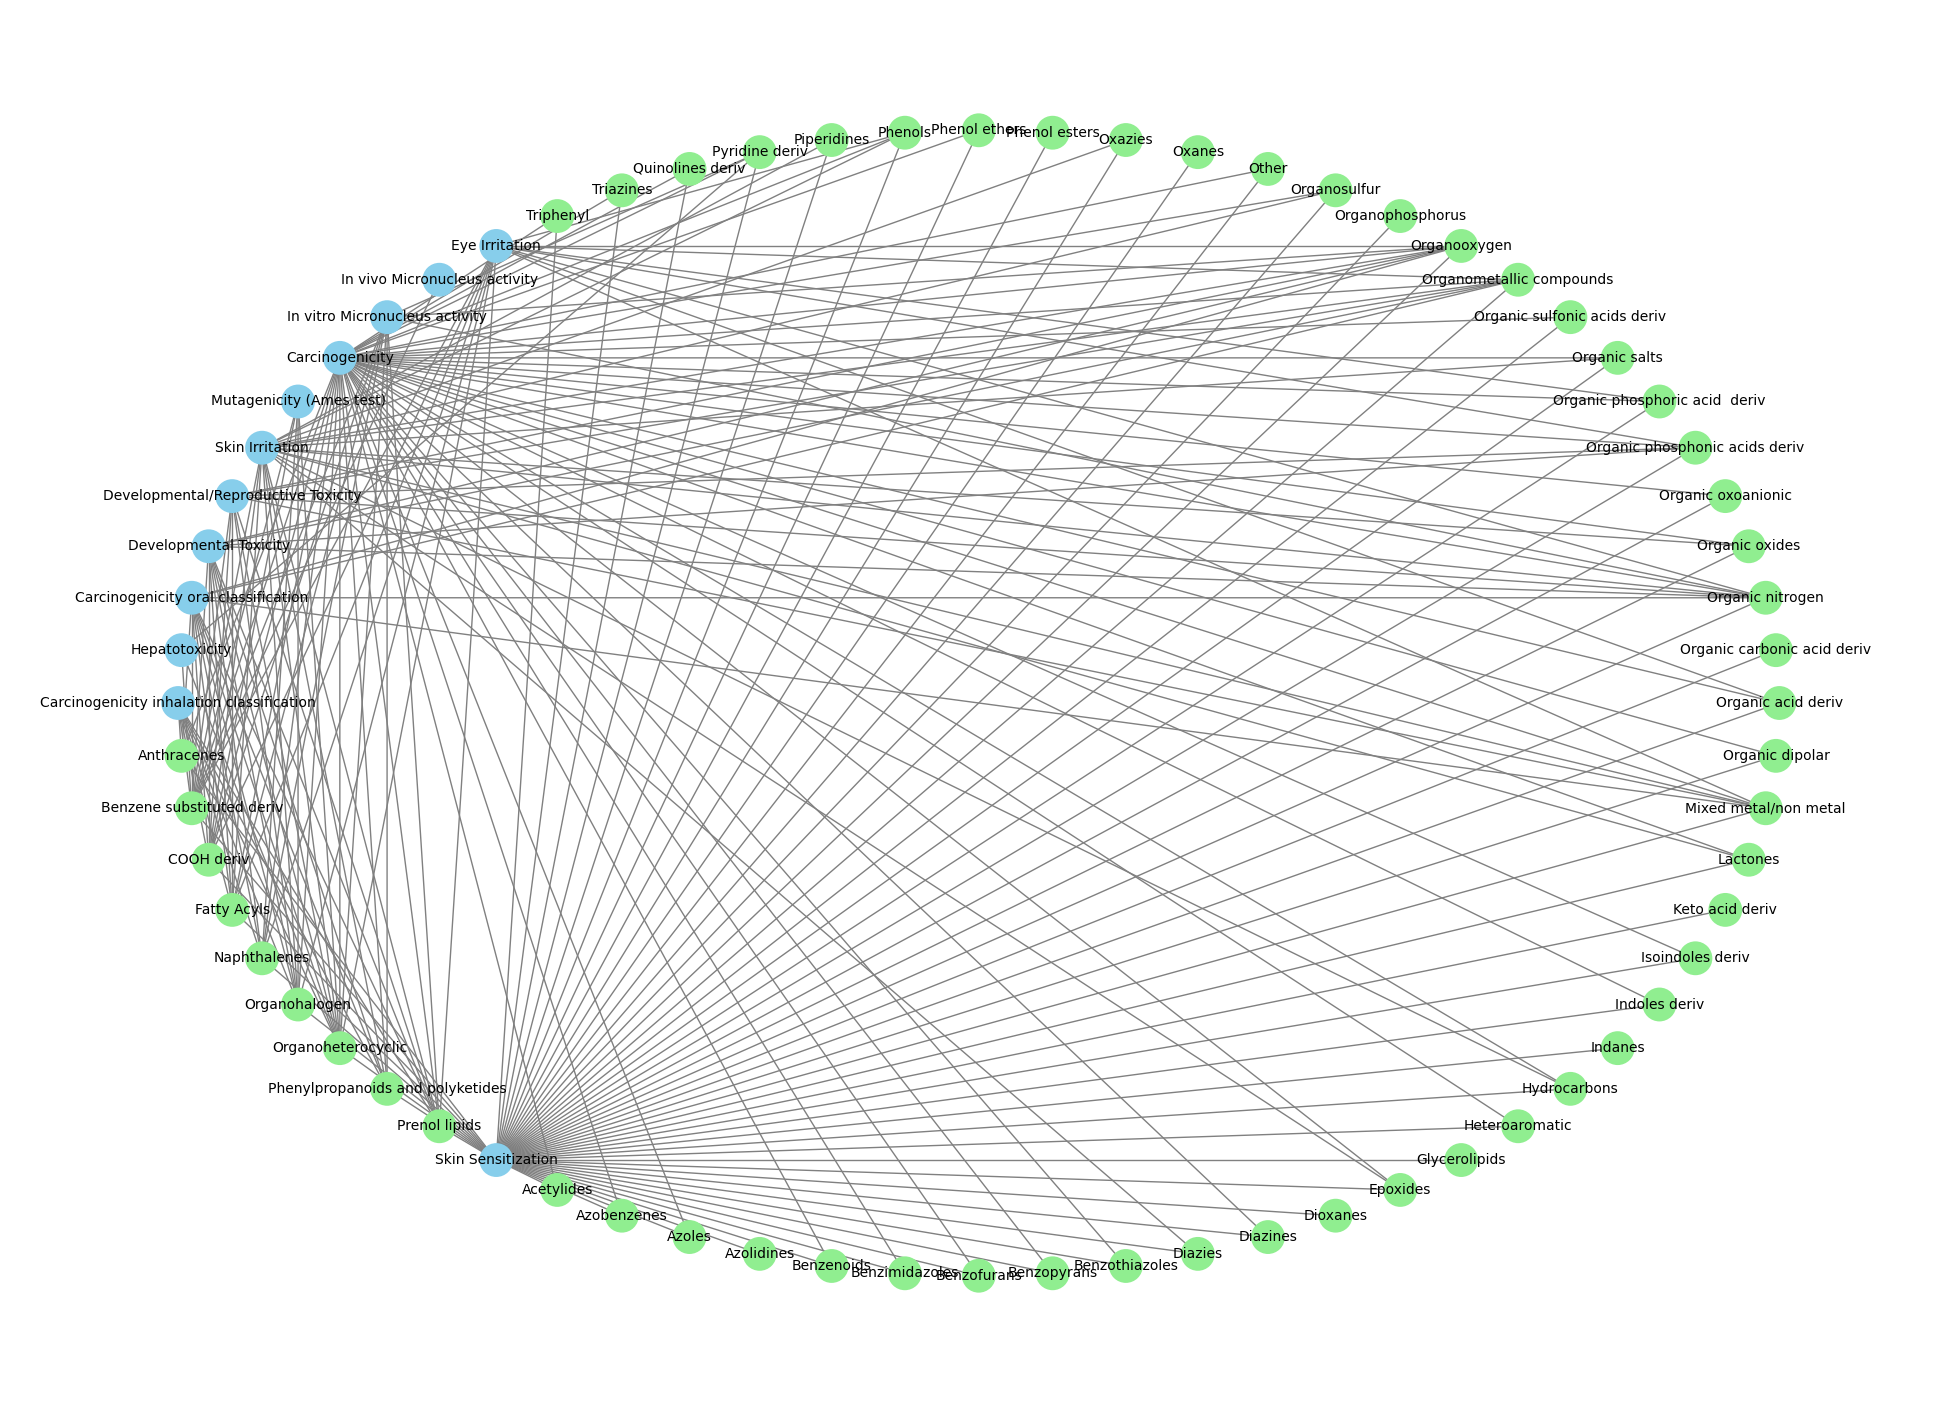

In [332]:
G = nx.from_pandas_edgelist(top_cat, 'Endpoint', 'Category2')
assays = top_cat['Endpoint'].unique()
terminal_categories = top_cat['Category2'].unique()
pos = nx.shell_layout(G)
pos2 = nx.kamada_kawai_layout(G)
# Create a new figure and axis
fig, ax = plt.subplots(figsize = (25,18))

# Position nodes using Fruchterman-Reingold force-directed algorithm
#pos = nx.spring_layout(G)
node_color = ['skyblue' if node in assays else 'lightgreen' for node in G.nodes]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_color, font_size=10,  edge_color='gray', linewidths=2, arrowsize=20, ax=ax)

# Show the plot
plt.show()
fig.savefig(figures_dir+'vega_nx.png', dpi = 300);